In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

In [10]:
data = pd.read_csv('./data/pokemon-challenge/pokemon.csv')

In [11]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [13]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


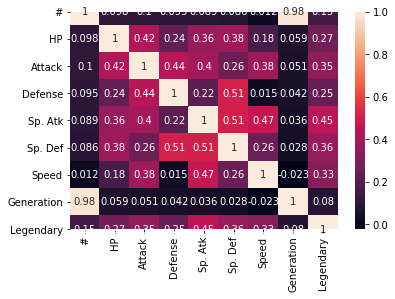

In [14]:
#correlation map
sns.heatmap(data.corr(), annot=True)

#Each square shows the correlation between the variables on each axis. 
#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.
#The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself
#(so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal 
#since the same two variables are being paired together in those squares



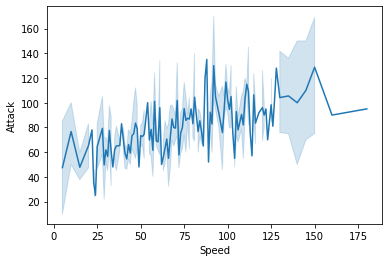

In [15]:
#Line plot is better when x axis is time.
sns.lineplot(x="Speed", y="Attack", data=data)

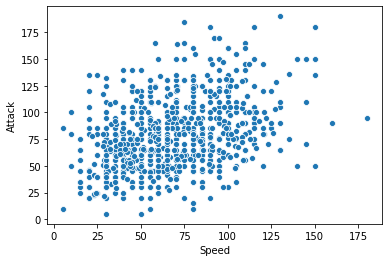

In [16]:
sns.scatterplot(x="Speed", y="Attack",data=data)

In [17]:
data.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

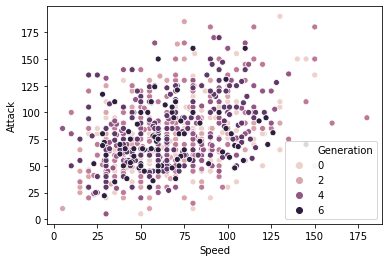

In [18]:
sns.scatterplot(x="Speed", y="Attack",data=data,hue='Generation')

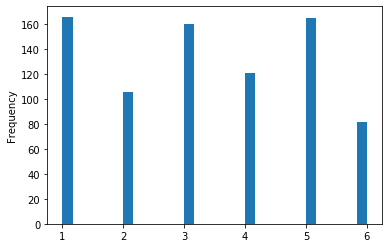

In [19]:
data.Generation.plot(kind = 'hist',bins =30)
plt.show()

In [20]:
#sns.pairplot(data, hue="Generation", height=3);

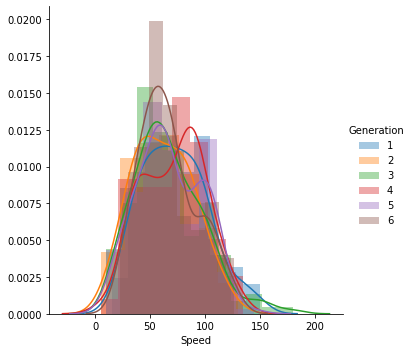

In [21]:
sns.FacetGrid(data, hue="Generation", height=5) \
   .map(sns.distplot, "Speed") \
   .add_legend();
plt.show();

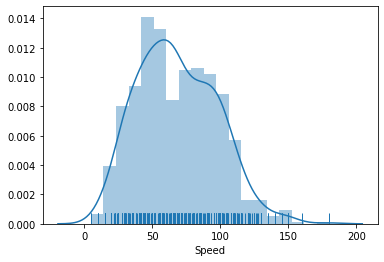

In [22]:
sns.distplot(data.Speed, rug=True, hist=True)

2659

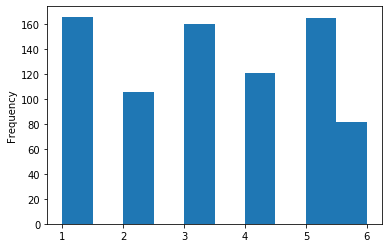

In [25]:
data['Generation'].plot(kind='hist')
sum(data['Generation'])

[0.415  0.     0.265  0.     0.4    0.     0.3025 0.     0.4125 0.205 ]
2.0
pdf [0.2075  0.      0.1325  0.      0.2     0.      0.15125 0.      0.20625
 0.1025 ]
bin [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
cdf [0.2075  0.2075  0.34    0.34    0.54    0.54    0.69125 0.69125 0.8975
 1.     ]
1.0


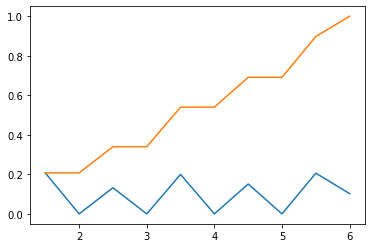

In [26]:
#If False, the result will contain the number of samples in each bin. If True, the result is the value of the
#probability density function at the bin, normalized such that the integral over the range is 
#If bins is an int, it defines the number of equal-width bin
#If bins is a string, it defines the method used to calculate the optimal bin width
#pdf prob at given point integral take cdf sum pdf 1 cdf range 
counts, bin_edges = np.histogram(data['Generation'], bins=10, density = True)
print(counts)
print(sum(counts))
pdf = counts/(sum(counts))
print('pdf',pdf);
print('bin',bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
print('cdf',cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

print(sum(pdf))

plt.show();

In [17]:
#Mean with an outlier.
print(np.mean(np.append(data["Speed"],1000)));
print(np.mean(data["Speed"]))

69.44069912609238
68.2775


In [27]:
np.std(data["Speed"])

29.042305241664295

In [28]:
np.median(data["Speed"])

65.0

In [29]:
#Median with an outlier
np.median(np.append(data["Speed"],1000))

65.0

In [ ]:
#quantiles
np.percentile(data["Speed"],np.arange(0, 100, 25))

In [5]:

np.percentile([1,2,3,4,5,6,7,8,9,10],50)

5.5

In [22]:
#90th Percentiles
np.percentile(data["Speed"],90)

106.0

In [23]:
from statsmodels import robust
#Median Absolute Deviation
robust.mad(data["Speed"])

31.134646588617642

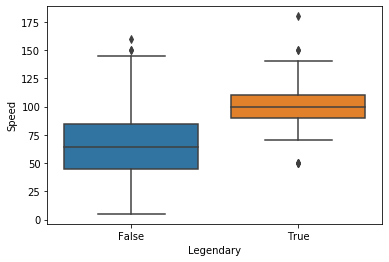

In [24]:
sns.boxplot(x='Legendary',y='Speed', data=data)
plt.show()

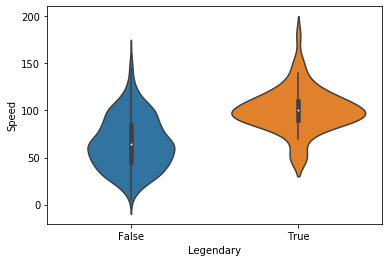

In [25]:
sns.violinplot(x="Legendary", y="Speed", data=data, size=8)
plt.show()

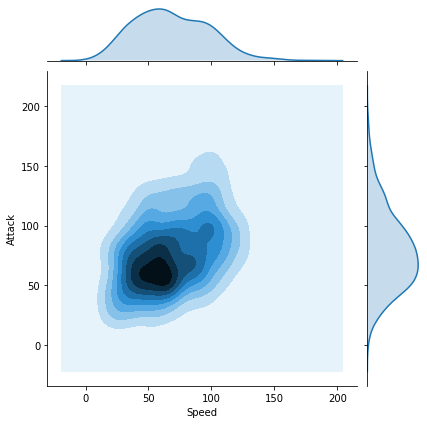

In [26]:
#2D Density plot, contors-plot
sns.jointplot(x="Speed", y="Attack", data=data, kind="kde");#kde
plt.show();

In [27]:
#filtering data
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [28]:
# built in scope
#import builtins
#dir(builtins)

In [29]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [30]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [31]:
data.shape

(800, 12)

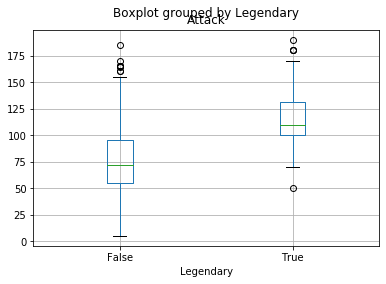

In [32]:
data.boxplot(column='Attack',by = 'Legendary')

In [33]:
# tidy data with melt()
data_new = data.head(5)    # I only take 5 rows into new data
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [34]:
melted=pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [35]:
#PIVOTING DATA  --> Reverse of melting.
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [32]:
#concatening data
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2]) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [37]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## R

In [38]:
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [39]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [40]:
#MISSING DATA and TESTING WITH ASSERT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 65.0+ KB


In [41]:
data["Type 2"].value_counts(dropna =False) # defaultly drop Na is true

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Water        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [42]:
null_columns = data.columns[data.isnull().any()]

null_colmn_value_sume=data[null_columns].isnull().sum()
null_colmn_value_sume

Name        1
Type 2    386
dtype: int64

In [43]:
# Lets drop nan values
data1=data  
data1["Type 2"].dropna(inplace = True)  
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 61.9+ KB


In [44]:
#assert statement
assert 1==1

In [45]:
assert  data['Type 2'].notnull().all()

In [46]:
data["Type 2"].fillna('empty',inplace = True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 61.9+ KB


In [48]:
assert data['Type 2'].notnull().all()

In [49]:
data["Type 2"].value_counts(dropna =False)

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

##  R

In [50]:
#building dataframes
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
print(list_col)
zipped = list(zip(list_label,list_col))
print(zipped)
data_dict = dict(zipped)
print('dict',data_dict)
df = pd.DataFrame(data_dict)
df

[['Spain', 'France'], ['11', '12']]
[('country', ['Spain', 'France']), ('population', ['11', '12'])]
dict {'country': ['Spain', 'France'], 'population': ['11', '12']}


,country,population
0,Spain,11
1,France,12


In [51]:
# Add new columns
df["capital"] = ["madrid","paris"]
df


,country,population,capital
0,Spain,11,madrid
1,France,12,paris


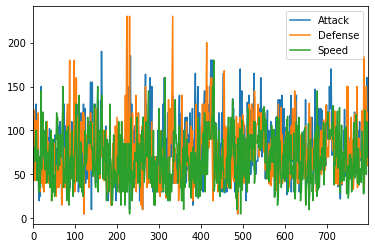

In [52]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()

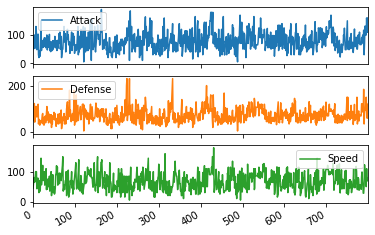

In [53]:
# subplots
data1.plot(subplots = True)  
plt.show()
#plt.subplot(m,n,p) divides the current figure into an m-by-n grid and creates axes in the position specified by p

In [54]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [55]:
#indexing pandas time series
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
type(date_list[1])
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [56]:
data2.loc["1992-03-10":"1993-03-16"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


### R Impor

In [57]:
#RESAMPLING PANDAS TIME SERIES¶
#Resampling: statistical method over different time intervals
#Needs string to specify frequency like "M" = month or "A" = year
#Downsampling: reduce date time rows to slower frequency like from daily to weekly
#Upsampling: increase date time rows to faster frequency like from daily to hourly
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [58]:
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## R

In [59]:
data2.resample("M").mean().interpolate("linear") 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [60]:
#INDEXING DATA FRAME
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [61]:
data.loc[1,["Attack","Defense"]]

Attack     49
Defense    49
Name: 1, dtype: object

In [62]:
data.loc[:,["Attack","Defense"]]

,Attack,Defense
#,,
1,49,49
2,62,63
3,82,83
4,100,123
5,52,43
...,...,...
796,100,150
797,160,110
798,110,60


## R

In [63]:
data.loc[len(data)-3:,["Attack","Defense"]]

,Attack,Defense
#,,
797,160,110
798,110,60
799,160,60
800,110,120


In [64]:
data.iloc[-1:]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
800,Volcanion,Fire,Water,80,110,120,130,90,70.0,6,True


In [65]:
data.tail(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
796,Diancie,Rock,Fairy,50,100,150,100,150,50.0,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110.0,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70.0,6,True
799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80.0,6,True
800,Volcanion,Fire,Water,80,110,120,130,90,70.0,6,True


In [66]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


In [67]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
type(data[["HP"]]) 

<class 'pandas.core.series.Series'>


pandas.core.frame.DataFrame

In [68]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [69]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [70]:
# From something to end
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
#,,,
1,45.0,1,False
2,60.0,1,False
3,80.0,1,False
4,80.0,1,False
5,65.0,1,False
6,80.0,1,False
7,100.0,1,False
8,100.0,1,False
9,100.0,1,False


In [71]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60.0,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65.0,5,False


In [72]:
#Transforming data
#using function
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [73]:
# using lambda
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [74]:
# new columns using other columns 
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [75]:
#INDEX OBJECTS AND LABELED DATA
data.index.name

'#'

In [76]:
data.index.name = "index_name"
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [77]:
#INDEX START FROM 100
data3 = data.copy()
data3.index = range(100,900,1)
data3

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Diancie,Rock,Fairy,50,100,150,100,150,50.0,6,True,250
896,Mega Diancie,Rock,Fairy,50,160,110,160,110,110.0,6,True,270
897,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70.0,6,True,170
898,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80.0,6,True,220


In [78]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(5)

Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                
Grass  Poison      Bulbasaur  45      49       49       65       65   45.0   
       Poison        Ivysaur  60      62       63       80       80   60.0   
       Poison       Venusaur  80      82       83      100      100   80.0   
       Poison  Mega Venusaur  80     100      123      122      120   80.0   
Fire   NaN        Charmander  39      52       43       60       50   65.0   

               Generation  Legendary  total_power  
Type 1 Type 2                                      
Grass  Poison           1      False           98  
       Poison           1      False          125  
       Poison           1      False          165  
       Poison           1      False          223  
Fire   NaN              1      False           95

In [79]:
#WE CAN USE ABOVE INDEX TO RETURN AS BELOW
data1.loc["Fire","Flying"]

Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Fire   Flying         Charizard   78      84       78      109       85   
       Flying  Mega Charizard Y   78     104       78      159      115   
       Flying           Moltres   90     100       90      125       85   
       Flying             Ho-oh  106     130       90      110      154   
       Flying       Fletchinder   62      73       55       56       52   
       Flying        Talonflame   78      81       71       74       69   

               Speed  Generation  Legendary  total_power  
Type 1 Type 2                                             
Fire   Flying  100.0           1      False          162  
       Flying  100.0           1      False          182  
       Flying   90.0           1       True          190  
       Flying   90.0           2       True          220  
       Flying   84.0           6      False          128  
       Flying  126.0           6      False          152

In [80]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [81]:
# pivoting
df.pivot(index="treatment",columns = "gender",values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


In [82]:
df1 = df.set_index(["treatment","gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [83]:
#unstack it
# level determines indexes
df1.unstack(level=0)


response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [84]:
df1.unstack(level=1)


response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [85]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


In [86]:
# according to treatment take means of other features
df.groupby("treatment").mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [87]:
# max value for each treatment (one feature)
df.groupby("treatment").age.max() 

treatment
A    15
B    72
Name: age, dtype: int64

In [88]:
# multiple features
df.groupby("treatment")[["age","response"]].min() 

,age,response
treatment,,
A,4,10
B,65,5


In [89]:
df.info()
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
#also we can define custom sort in specific category easily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
treatment    4 non-null object
gender       4 non-null object
response     4 non-null int64
age          4 non-null int64
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


In [90]:
df.head()

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


## R

In [91]:
df['age'].map(lambda g:g+1)

0    16
1     5
2    73
3    66
Name: age, dtype: int64

In [92]:
df['age'].map(lambda g:g/2)

0     7.5
1     2.0
2    36.0
3    32.5
Name: age, dtype: float64

In [93]:
def gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
df['gender'].apply(gender)

0    0
1    1
2    0
3    1
Name: gender, dtype: int64

In [94]:
df.head()

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [95]:
#df.somecolumn = df.somecolumn.astype(int) for changing true false to 1 0
variable_name = {'F' : 0 , 'M' : 1 }

df['gender'] = df['gender'].map(variable_name)

In [96]:
df.head()

,treatment,gender,response,age
0,A,0,10,15
1,A,1,45,4
2,B,0,5,72
3,B,1,9,65


In [98]:
print(df["gender"])
df["gender"].values 

0    0
1    1
2    0
3    1
Name: gender, dtype: int64


array([0, 1, 0, 1])

In [1]:
#df['loan_status'] = np.where(df['terms']==30, 'PAIDOFF','null')
#print(df)
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])